<a href="https://colab.research.google.com/github/Vit5te/Project-SQL-Python/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Mate_homework
sales_data_events = pd.read_csv("events.csv")
sales_data_countries = pd.read_csv("countries.csv")
sales_data_products = pd.read_csv("products.csv")
'''sales_data["order_date"] = pd.to_datetime(sales_data["order_date"], format="%Y-%m-%d")'''

sales_data_products.head().rename(columns={'id': 'product_id'})

Mounted at /content/drive
/content/drive/MyDrive/Mate_homework


,product_id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
sales_data_events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,product_id,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
sales_data_countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


#Data overview. Розуміння даних та їх змісту.
Ми маємо три таблиці, які вказують на продаж товарів в магазинах. Є основна таблиця з подіями, в якій маємо опис ціни, кількості проданих одиниць, каналів, коду краіни, коли було замовлення та дата відпраки. Додатково до неї маємо ще 2 таблиці. Вони описують найменування продуктів, які продаються, та розшифрування коду країни.  
Ключові поля, які поєднують таблиці: Country Code - alpha-3, Product ID - id.

#Data cleaning.
Робота із пропущеними даними, некоректними даними, аномаліями.

- Подивись, чи є пропущені значення у кожній таблиці, оціни їх долю, спробуй зрозуміти причини їх виникнення.
- Заповни або видали пропущені значення, обґрунтувавши свою думку.
- Подивись, чи всі типи даних розпізнаються коректно. Якщо є розбіжності, потрібно виявити та усунути причини, за потреби, зробити перетворення типів у колонках.
- Досліди дані на наявність дублікатів. Зверни увагу, що дублікати можуть траплятися через зайві пробіли (або інші символи) у комірках, розбіжність у великих/малих літерах, схожість літер у кирилиці/латиниці тощо. За потреби, зроби перетворення для усунення дублікатів.
- Досліди дані на наявність аномалій. Якщо є, спробуй зрозуміти причини.

In [ ]:
#Перевірка пропушених значень
print(sales_data_products.isna().sum())
print(sales_data_events.isna().sum())
print(sales_data_countries.isna().sum())

id           0
item_type    0
dtype: int64
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


In [ ]:
#Відсоток пропушених значень
print(sales_data_products.isna().sum() / sales_data_products.shape[0] * 100)
print(sales_data_events.isna().sum() / sales_data_events.shape[0] * 100)
print(sales_data_countries.isna().sum() / sales_data_countries.shape[0] * 100)

id           0.0
item_type    0.0
dtype: float64
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


Дані показують низкий відсоток пропущених значень, але найбільше - 6.16% в Код країни.
Значення могли пропуститись через "людський фактор" та  могли не вказати підчас замовлення данні.

In [ ]:
#Видалення пропусків.
sales_data_countries.dropna()
sales_data_events.dropna()
#Заповнення пропусків.
s_events_filled_0 = sales_data_events.fillna("0")

Видалили пропуски, так як їх маленткий відсоток. Та їхнє видалення не повпливає на результат.
Заповнення пропусків. Відбувалось так як доволі високий відсоток пропуску - 6.16%. Тому, рядки потрібно зберегти, щоб не було  спотворення результатів.

In [ ]:
#Перевірка типів данних
print(sales_data_events.dtypes)
print(sales_data_products.dtypes)
print(sales_data_countries.dtypes)

Order ID                   int64
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Order Priority            object
Country Code              object
Product ID                 int64
Sales Channel             object
Units Sold               float64
Unit Price               float64
Unit Cost                float64
dtype: object
id            int64
item_type    object
dtype: object
name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object


In [ ]:
#Перетворення типів данних в колонках
sales_data_events["Order Date"] = pd.to_datetime(sales_data_events["Order Date"])
sales_data_events["Ship Date"] = pd.to_datetime(sales_data_events["Ship Date"])

In [ ]:
#Дослідження на дублікати
duplicate_rows = sales_data_events.duplicated()
print(duplicate_rows.sum())

duplicate_rows_2 = sales_data_countries.duplicated()
print(duplicate_rows_2.sum())

duplicate_rows_3 = sales_data_products.duplicated()
print(duplicate_rows_3.sum())

0
0
0


Дублікати відсутні.

In [ ]:
#Дослідження на аномалії
sales_data_events.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330,1330,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,5788.096241,4952.201807,264.893541,187.246812
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,2011-12-16 06:00:00,2012-01-03 00:00:00,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,2013-10-17 00:00:00,2013-11-09 00:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,2015-08-28 18:00:00,2015-10-03 18:00:00,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573882e+08,NaN,NaN,2820.728878,2905.198996,217.323460,176.158873


Аномалій не виявлено.

#Data analysis and visualization.
Аналіз та візуалізація даних, знаходження цінних інсайтів.

Обʼєднання таблиць в один датафрейм

In [ ]:
sales_data_countries.rename(columns={'alpha-3': 'Country Code'}, inplace=True)
sales_data_products.rename(columns={'id': 'Product ID'}, inplace=True)

merged_df_outer = pd.merge(sales_data_events, sales_data_countries, on = 'Country Code', how = 'inner')
merged_df_outer2 = pd.merge(merged_df_outer, sales_data_products, on = "Product ID", how = 'inner')
merged_df_outer2.loc[merged_df_outer2['Sales Channel'] == 'online', 'Sales Channel'] == 'Online'
print(merged_df_outer2)


       Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0     100640618 2014-10-08 2014-10-18              M          NOR        2103   
1     100983083 2016-08-11 2016-08-11              C          SRB        2103   
2     102230632 2017-05-13 2017-06-13              L          MNE        2455   
3     103435266 2012-08-11 2012-09-18              H          SRB        1270   
4     103450715 2015-03-15 2015-04-18              H          SVK        8681   
...         ...        ...        ...            ...          ...         ...   
1243  994504153 2017-01-10 2017-01-13              M          SWE        4594   
1244  994978797 2014-12-05 2015-01-02              H          ITA        1270   
1245  996754205 2010-09-20 2010-09-22              L          RUS        7331   
1246  998043382 2010-06-15 2010-07-03              H          MLT        8293   
1247  999879729 2012-03-31 2012-05-06              M          ALB        7940   

     Sales Channel  Units S

In [ ]:
# Загальна кількість замовлень
total_orders = merged_df_outer2['Order ID'].nunique()

#Загальний дохід
total_revenue = merged_df_outer2['Units Sold'] * merged_df_outer2['Unit Price']
merged_df_outer2['Total Revenue'] = merged_df_outer2['Units Sold'] * merged_df_outer2['Unit Price']
merged_df_outer2['Total Revenue'] = merged_df_outer2['Total Revenue'].fillna(0)

# Загальний прибуток
total_profit  = (merged_df_outer2['Unit Price'] - merged_df_outer2['Unit Cost']) * merged_df_outer2['Units Sold']

merged_df_outer2['Total Profit'] = (merged_df_outer2['Unit Price'] - merged_df_outer2['Unit Cost']) * merged_df_outer2['Units Sold']
merged_df_outer2['Total Profit'] = merged_df_outer2['Total Profit'].fillna(0)

# Загальна кількість охоплених країн
total_countries = merged_df_outer2['Country Code'].nunique()

# Середній прибуток на замовлення
average_profit_per_order = total_profit / total_orders

# Середня кількість проданих одиниць на замовлення
average_units_sold_per_order = merged_df_outer2.groupby('Order ID')['Units Sold'].sum().mean()

# Кількість онлайн та офлайн замовлень
merged_df_outer2.loc[merged_df_outer2['Sales Channel'] == 'online', 'Sales Channel'] == 'Online'
sales_channel_counts = merged_df_outer2['Sales Channel'].value_counts()


top_5_countries_by_profit = merged_df_outer2.groupby('Country Code')['Total Profit'].sum().nlargest(5)


# Топ 5 продуктів за прибутком
top_5_products_by_profit = merged_df_outer2.groupby('item_type')['Total Profit'].sum().nlargest(5)

merged_df_outer2['Sales Channel'].replace('online', 'Online')

# Виведення результатів
print(f"Загальна кількість замовлень: {total_orders}")
print(f"Загальний дохід:{total_revenue.sum():.2f}")
print(f"Загальний прибуток:{total_profit.sum():.2f}")
print(f"Загальна кількість охоплених країн: {total_countries}")
print(f"Середній прибуток на замовлення: ${average_profit_per_order:}")
print(f"Середня кількість проданих одиниць на замовлення: {average_units_sold_per_order:.2f}")
print("\nКількість онлайн та офлайн замовлень:")
print(sales_channel_counts)
print("\nТоп 5 продуктів за прибутком:")
print(top_5_products_by_profit)

Загальна кількість замовлень: 1248
Загальний дохід:1598983761.26
Загальний прибуток:473709035.06
Загальна кількість охоплених країн: 45
Середній прибуток на замовлення: $0        46.140625
1       141.474255
2        68.908846
3        95.967692
4       224.579327
           ...    
1243      9.141779
1244     65.149615
1245     44.089455
1246    288.390144
1247    728.521458
Length: 1248, dtype: float64
Середня кількість проданих одиниць на замовлення: 4945.25

Кількість онлайн та офлайн замовлень:
Sales Channel
Offline    623
Online     622
online       3
Name: count, dtype: int64

Топ 5 продуктів за прибутком:
item_type
Cosmetics          88010907.56
Office Supplies    73411976.25
Household          69160454.84
Baby Food          50256042.90
Clothes            42544746.72
Name: Total Profit, dtype: float64


Проаналізуй продажі (доходи, витрати, прибутки, популярність товарів) та зроби відповідні візуалізації в розрізі:

- категорій товарів;
- географії (країн, регіонів);
- каналів продажу (онлайн або офлайн).

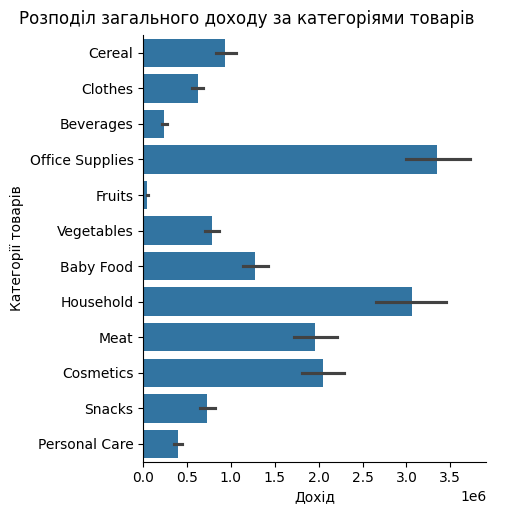

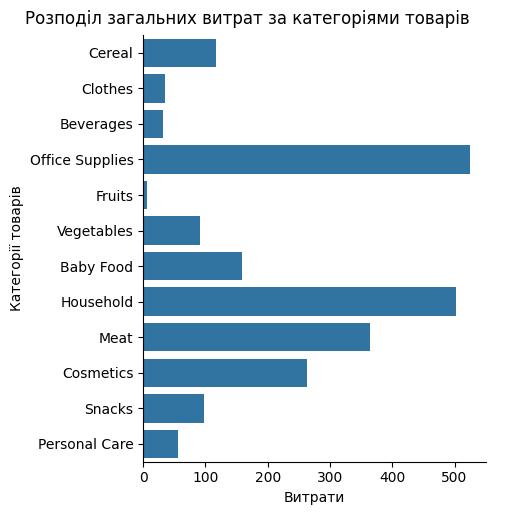

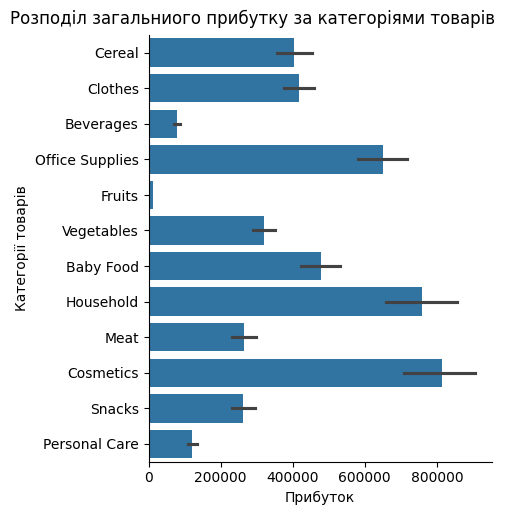

In [ ]:
#Аналіз доходів, витрат та прибутків в розрізі категорій товарів
products_by_profit = merged_df_outer2.groupby('item_type')['Total Profit'].sum()
products_by_revenue = merged_df_outer2.groupby('item_type')["Total Revenue"].sum()
products_by_costs = merged_df_outer2.groupby('item_type')["Unit Cost"].sum()

#Візуалізація доходів по категоріям товарів
sns.catplot(data=merged_df_outer2, x="Total Revenue", y ="item_type", kind="bar")
plt.suptitle("Розподіл загального доходу за категоріями товарів", y=1.02)
plt.xlabel("Дохід")
plt.ylabel("Категорії товарів")
plt.show()

#Візуалізація витрат по категоріям товарів
sns.catplot(data=merged_df_outer2, x="Unit Cost", y ="item_type", kind="bar")
plt.suptitle("Розподіл загальних витрат за категоріями товарів", y=1.02)
plt.xlabel("Витрати")
plt.ylabel("Категорії товарів")
plt.show()

#Візуалізація прибуток по категоріям товарів
sns.catplot(data=merged_df_outer2, x="Total Profit", y ="item_type", kind="bar")
plt.suptitle("Розподіл загальниого прибутку за категоріями товарів", y=1.02)
plt.xlabel("Прибуток")
plt.ylabel("Категорії товарів")
plt.show()

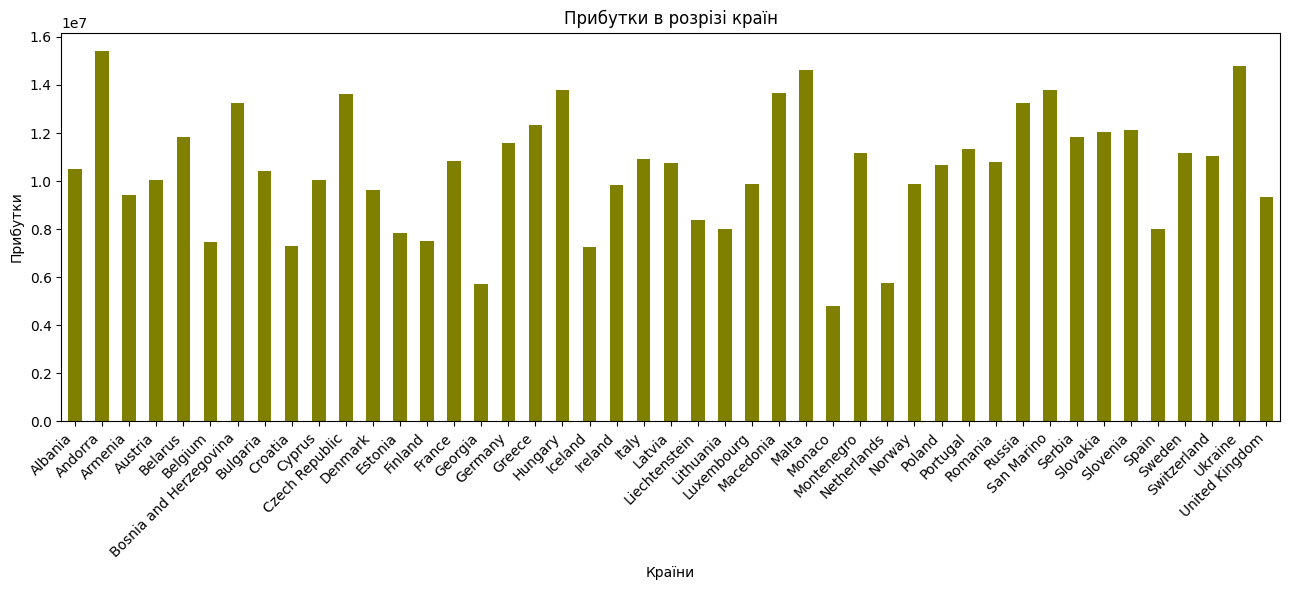

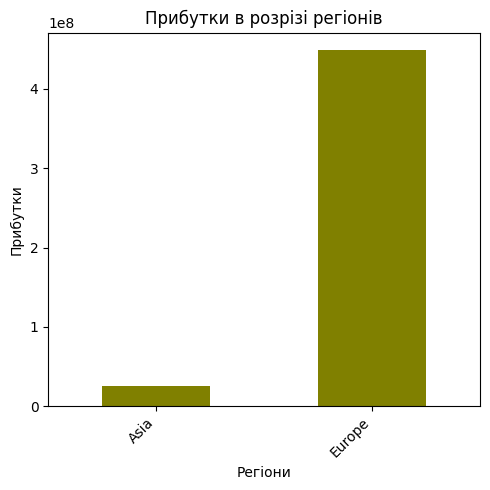

In [ ]:
#Аналіз доходів, витрат та прибутків в розрізі країн та регіонів
countries_by_profit = merged_df_outer2.groupby('name')['Total Profit'].sum()
region_by_profit = merged_df_outer2.groupby('region')['Total Profit'].sum()

countries_by_revenue = merged_df_outer2.groupby('name')["Total Revenue"].sum()
region_by_revenue = merged_df_outer2.groupby('region')["Total Revenue"].sum()

countries_by_costs = merged_df_outer2.groupby('name')["Unit Cost"].sum()
region_by_costs = merged_df_outer2.groupby('region')["Unit Cost"].sum()

#Прибутки в розрізі країн
plt.figure(figsize=(13, 6))  # Розмір графіка (за бажанням)
countries_by_profit.plot(kind='bar', color='olive')
plt.title('Прибутки в розрізі країн')
plt.xlabel('Країни')
plt.ylabel('Прибутки')
plt.xticks(rotation=45, ha='right')  # Повертаємо підписи на осі X для кращої читабельності
plt.tight_layout()  # Автоматичне регулювання параметрів підграфіка
plt.show()

#Прибутки в розрізі регіонів
plt.figure(figsize=(5, 5))  # Розмір графіка (за бажанням)
region_by_profit.plot(kind='bar', color='olive')
plt.title('Прибутки в розрізі регіонів')
plt.xlabel('Регіони')
plt.ylabel('Прибутки')
plt.xticks(rotation=45, ha='right')  # Повертаємо підписи на осі X для кращої читабельності
plt.tight_layout()  # Автоматичне регулювання параметрів підграфіка
plt.show()

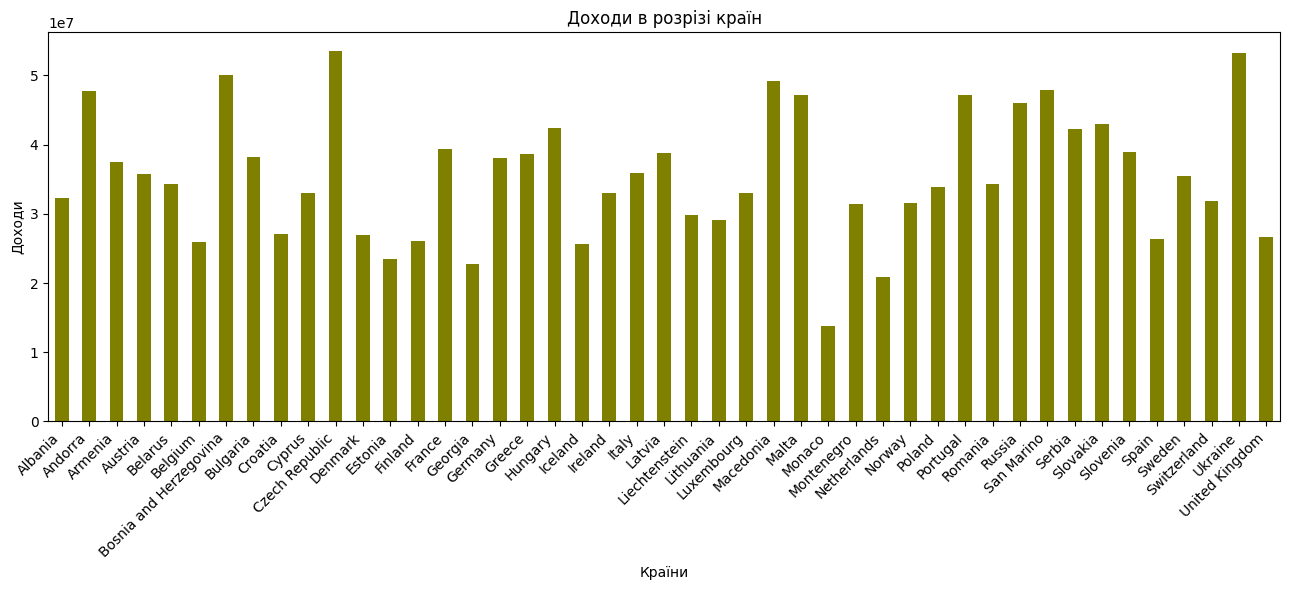

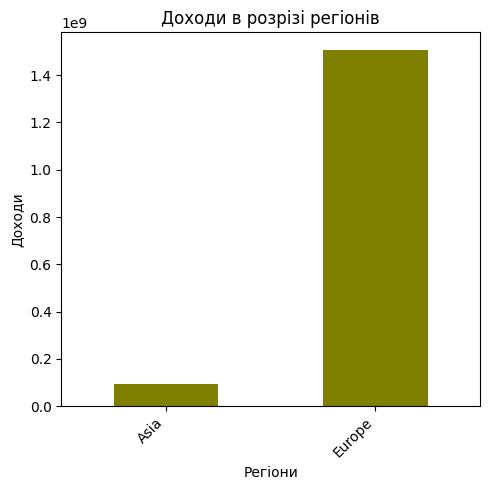

In [ ]:
#Доходи в розрізі країн
plt.figure(figsize=(13, 6))  # Розмір графіка (за бажанням)
countries_by_revenue.plot(kind='bar', color='olive')
plt.title('Доходи в розрізі країн')
plt.xlabel('Країни')
plt.ylabel('Доходи')
plt.xticks(rotation=45, ha='right')  # Повертаємо підписи на осі X для кращої читабельності
plt.tight_layout()  # Автоматичне регулювання параметрів підграфіка
plt.show()

#Доходи в розрізі регіонів
plt.figure(figsize=(5, 5))  # Розмір графіка (за бажанням)
region_by_revenue.plot(kind='bar', color='olive')
plt.title('Доходи в розрізі регіонів')
plt.xlabel('Регіони')
plt.ylabel('Доходи')
plt.xticks(rotation=45, ha='right')  # Повертаємо підписи на осі X для кращої читабельності
plt.tight_layout()  # Автоматичне регулювання параметрів підграфіка
plt.show()

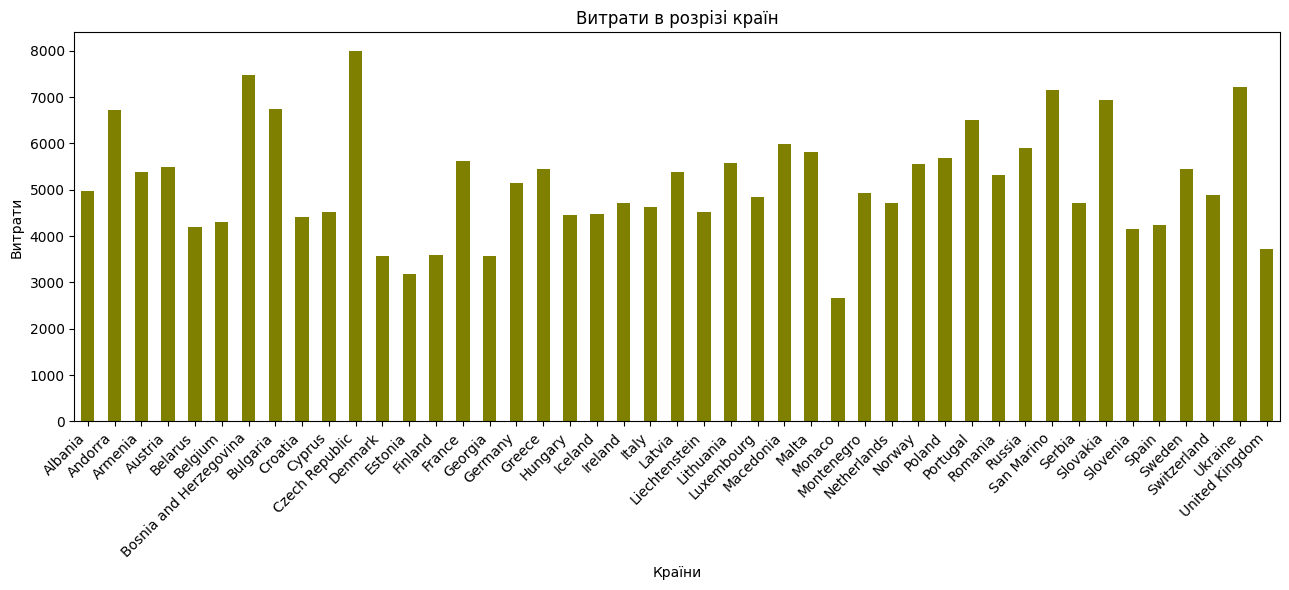

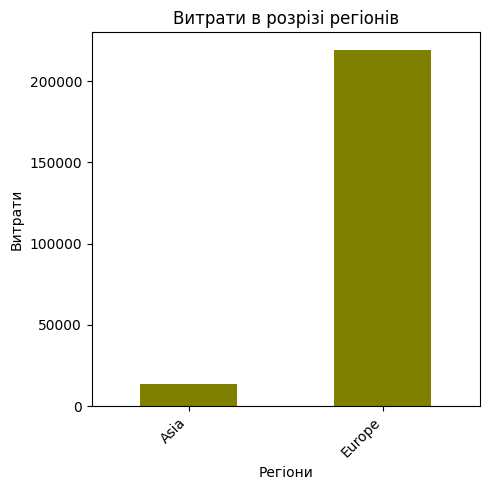

In [ ]:
#Витрати в розрізі країн
plt.figure(figsize=(13, 6))  # Розмір графіка (за бажанням)
countries_by_costs.plot(kind='bar', color='olive')
plt.title('Витрати в розрізі країн')
plt.xlabel('Країни')
plt.ylabel('Витрати')
plt.xticks(rotation=45, ha='right')  # Повертаємо підписи на осі X для кращої читабельності
plt.tight_layout()  # Автоматичне регулювання параметрів підграфіка
plt.show()

#Витрати в розрізі регіонів
plt.figure(figsize=(5, 5))
region_by_costs.plot(kind='bar', color='olive')
plt.title('Витрати в розрізі регіонів')
plt.xlabel('Регіони')
plt.ylabel('Витрати')
plt.xticks(rotation=45, ha='right')  # Повертаємо підписи на осі X для кращої читабельності
plt.tight_layout()  # Автоматичне регулювання параметрів підграфіка
plt.show()

#Проаналізуй інтервал часу між замовленням та його відвантаженням та зроби відповідні візуалізації в розрізі:

- категорій товарів;
- країн;
- регіонів.

0       10
1        0
2       31
3       38
4       34
        ..
1243     3
1244    28
1245     2
1246    18
1247    36
Name: Shipping Time, Length: 1248, dtype: int64


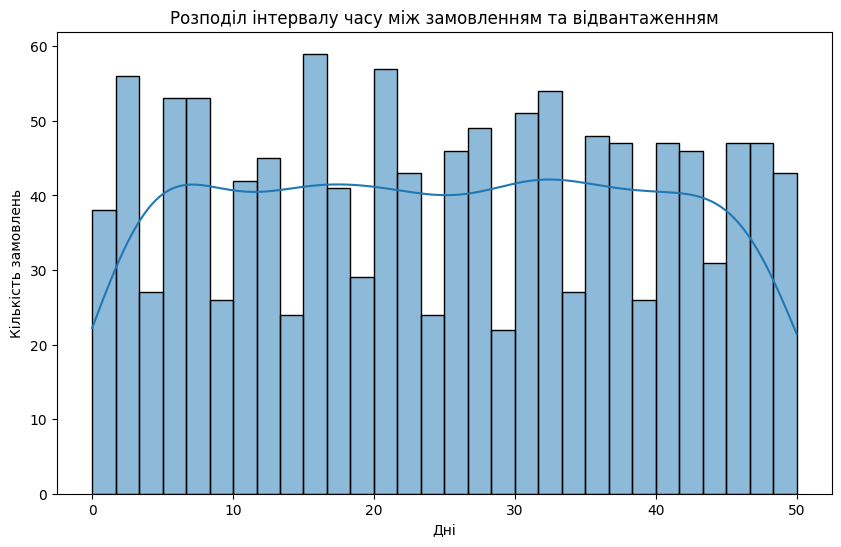

In [ ]:
# Розрахунок інтервалу часу між замовленням та відвантаженням
merged_df_outer2['Shipping Time'] = (merged_df_outer2['Ship Date'] - merged_df_outer2['Order Date']).dt.days
print(merged_df_outer2['Shipping Time'])
# Розподіл інтервалу часу
plt.figure(figsize=(10, 6))
sns.histplot(merged_df_outer2['Shipping Time'], bins=30, kde=True)
plt.title('Розподіл інтервалу часу між замовленням та відвантаженням')
plt.xlabel('Дні')
plt.ylabel('Кількість замовлень')
plt.show()

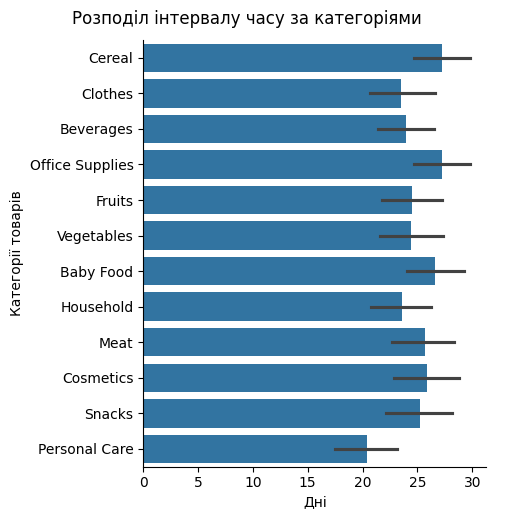

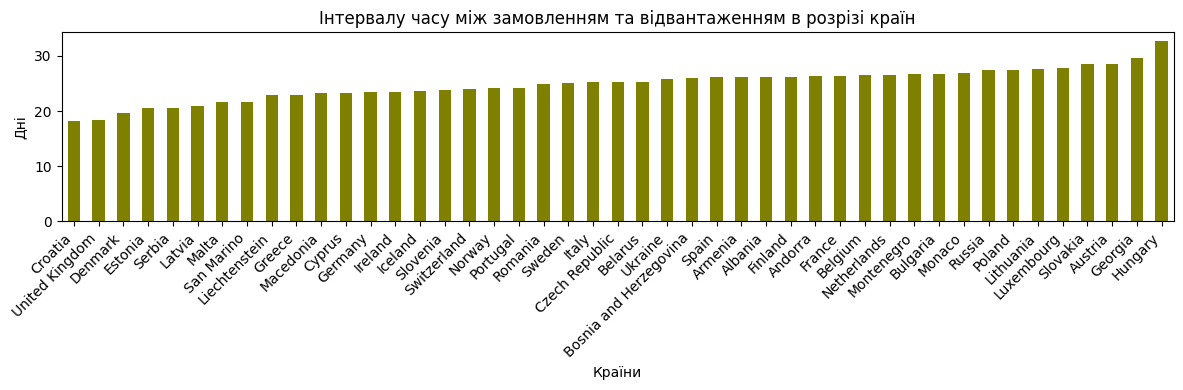

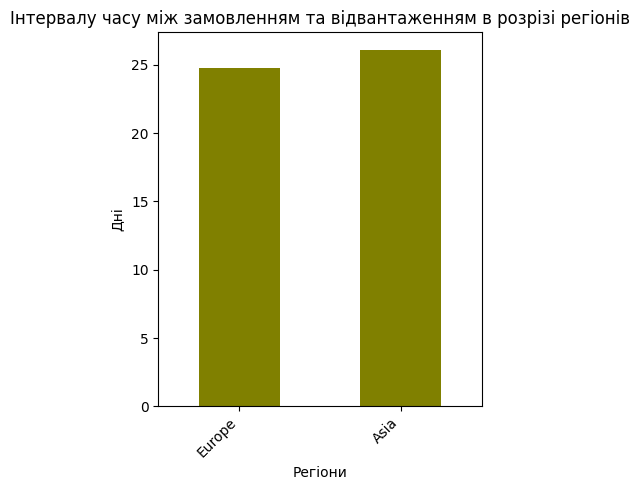

region
Europe    24.777873
Asia      26.085366
Name: Shipping Time, dtype: float64


In [ ]:
# Розрахунок інтервалу часу між замовленням та відвантаженням в розрізі категорії товарів
time_interval_ctg_prdcts = merged_df_outer2.groupby('item_type')['Shipping Time'].mean().sort_values()
# Візуалізація розподілу інтервалу часу за категоріями
sns.catplot(data=merged_df_outer2, x="Shipping Time", y ="item_type", kind="bar")
plt.suptitle("Розподіл інтервалу часу за категоріями",y = 1.03)
plt.xlabel("Дні")
plt.ylabel("Категорії товарів")
plt.show()



# Розрахунок інтервалу часу між замовленням та відвантаженням в розрізі країн
time_interval_countries = merged_df_outer2.groupby('name')['Shipping Time'].mean().sort_values()
# Візуалізація розподілу інтервалу часу в розрізі країн
plt.figure(figsize=(12, 4))  # Розмір графіка (за бажанням)
time_interval_countries.plot(kind='bar', color='olive')
plt.title('Iнтервалу часу між замовленням та відвантаженням в розрізі країн')
plt.xlabel('Країни')
plt.ylabel('Дні')
plt.xticks(rotation=45, ha='right')  # Повертаємо підписи на осі X для кращої читабельності
plt.tight_layout()  # Автоматичне регулювання параметрів підграфіка
plt.show()

# Розрахунок інтервалу часу між замовленням та відвантаженням в розрізі регіонів
time_interval_region = merged_df_outer2.groupby('region')['Shipping Time'].mean().sort_values()
# Візуалізація розподілу інтервалу часу в розрізі регіонів
plt.figure(figsize=(4, 5))
time_interval_region.plot(kind='bar', color='olive')
plt.title('Iнтервалу часу між замовленням та відвантаженням в розрізі регіонів')
plt.xlabel('Регіони')
plt.ylabel('Дні')
plt.xticks(rotation=45, ha='right')  # Повертаємо підписи на осі X для кращої читабельності
plt.tight_layout()  # Автоматичне регулювання параметрів підграфіка
plt.show()


print(time_interval_region)

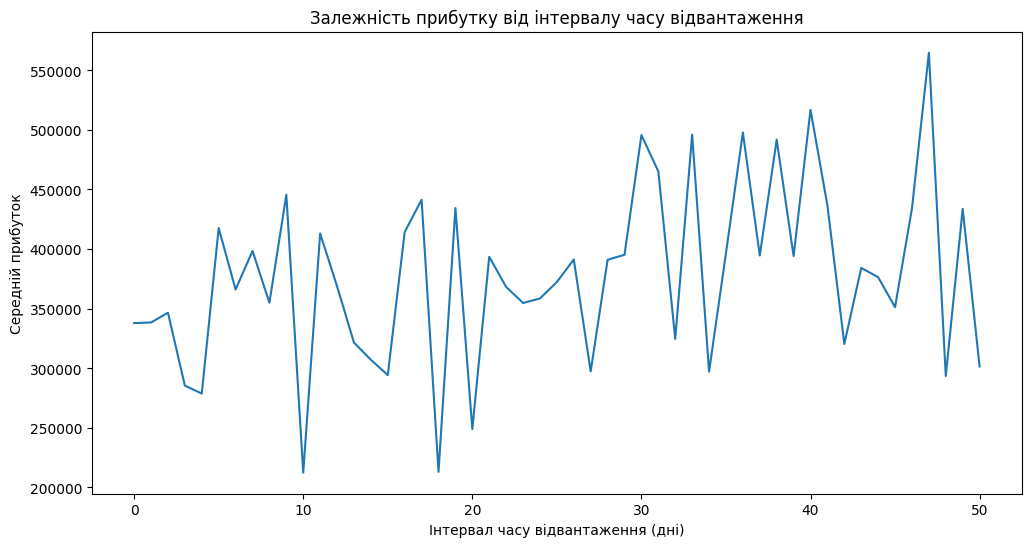

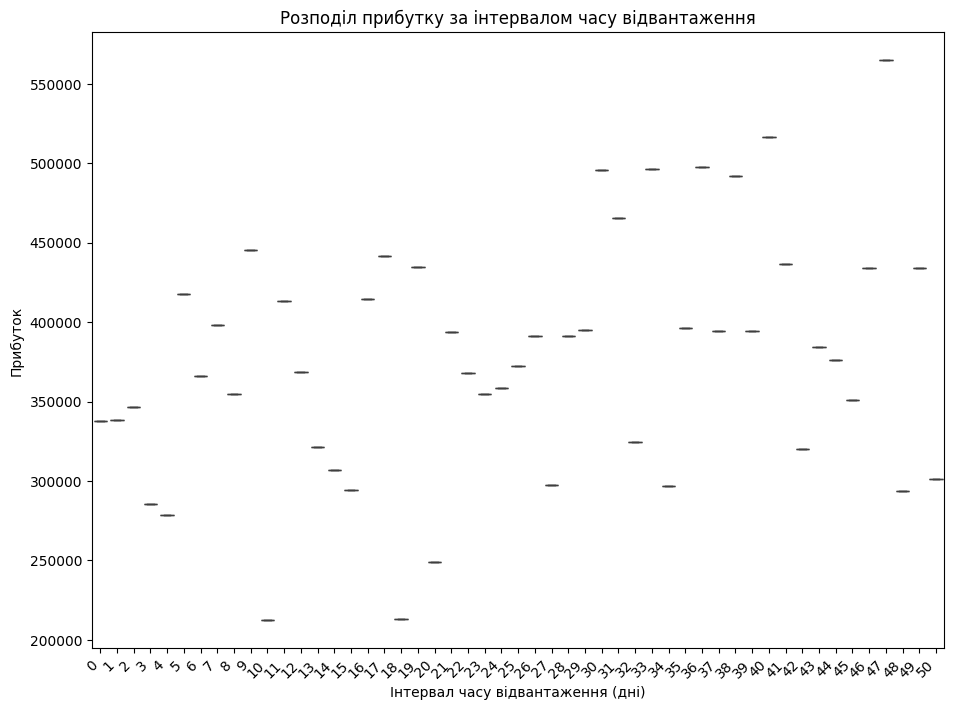

In [ ]:
# Агрегація даних за інтервалом часу відвантаження
shipping_time_profit = merged_df_outer2.groupby('Shipping Time')['Total Profit'].mean().reset_index()

# Візуалізація залежності прибутку від часу відвантаження
plt.figure(figsize=(12, 6))
sns.lineplot(x='Shipping Time', y='Total Profit', data=shipping_time_profit)
plt.title('Залежність прибутку від інтервалу часу відвантаження')
plt.xlabel('Інтервал часу відвантаження (дні)')
plt.ylabel('Середній прибуток')
plt.show()

# Візуалізація розподілу прибутку за інтервалом часу відвантаження
plt.figure(figsize=(11, 8))
sns.boxplot(x='Shipping Time', y='Total Profit', data=shipping_time_profit)
plt.title('Розподіл прибутку за інтервалом часу відвантаження')
plt.xlabel('Інтервал часу відвантаження (дні)')
plt.ylabel('Прибуток')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-65-946c1822109b>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_category_sales = merged_df_outer2.groupby([pd.Grouper(key='Order Date', freq='Y'), 'item_type'])['Units Sold'].sum().reset_index()


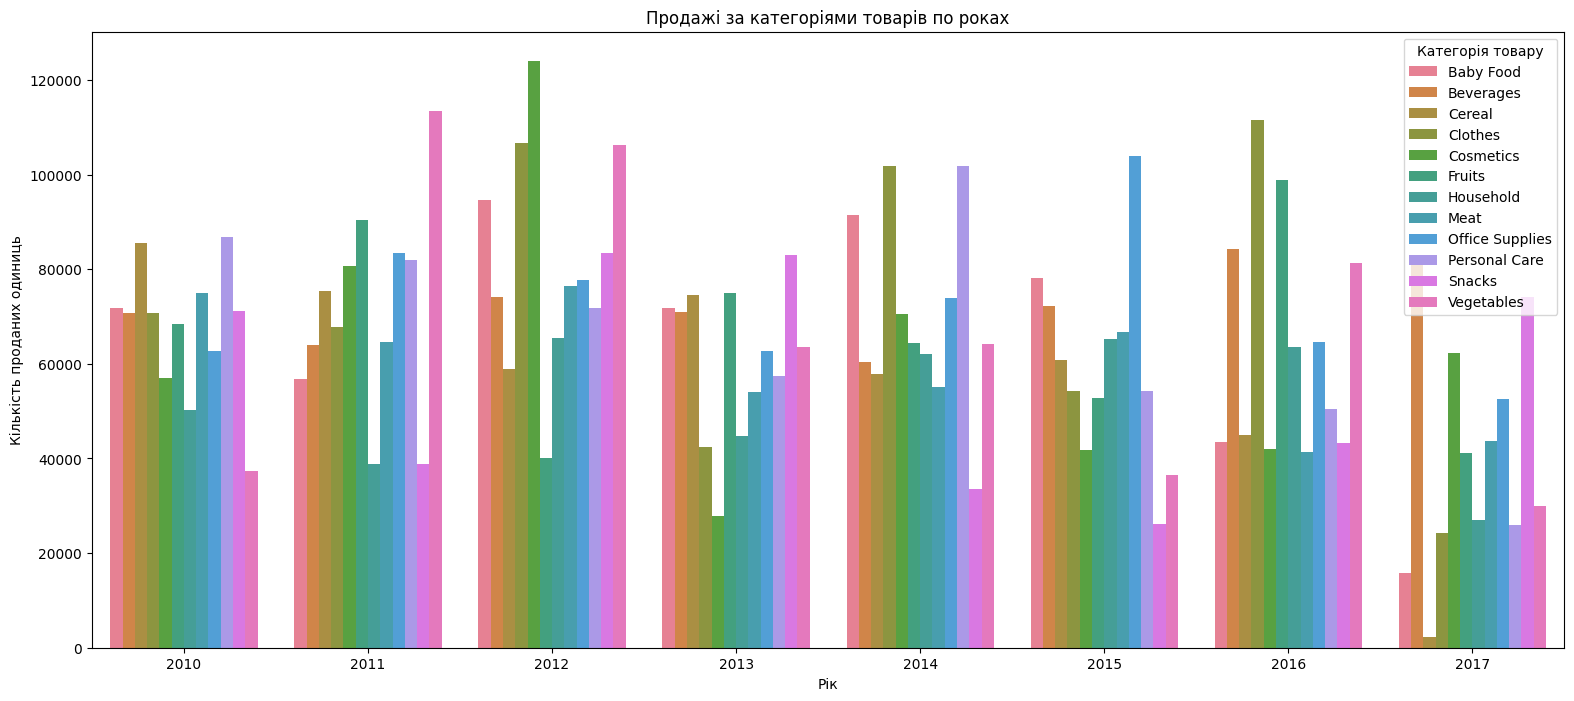

In [ ]:
# Агрегація даних за роком та категорією
yearly_category_sales = merged_df_outer2.groupby([pd.Grouper(key='Order Date', freq='Y'), 'item_type'])['Units Sold'].sum().reset_index()

# Перетворення 'Order Date' на рік (для гістограми)
yearly_category_sales['Year'] = yearly_category_sales['Order Date'].dt.year
# Візуалізація продажів за категоріями по роках
plt.figure(figsize=(19, 8))
sns.barplot(x='Year', y='Units Sold', hue='item_type', data=yearly_category_sales)
plt.title('Продажі за категоріями товарів по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість проданих одиниць')
plt.legend(title='Категорія товару')
plt.show()

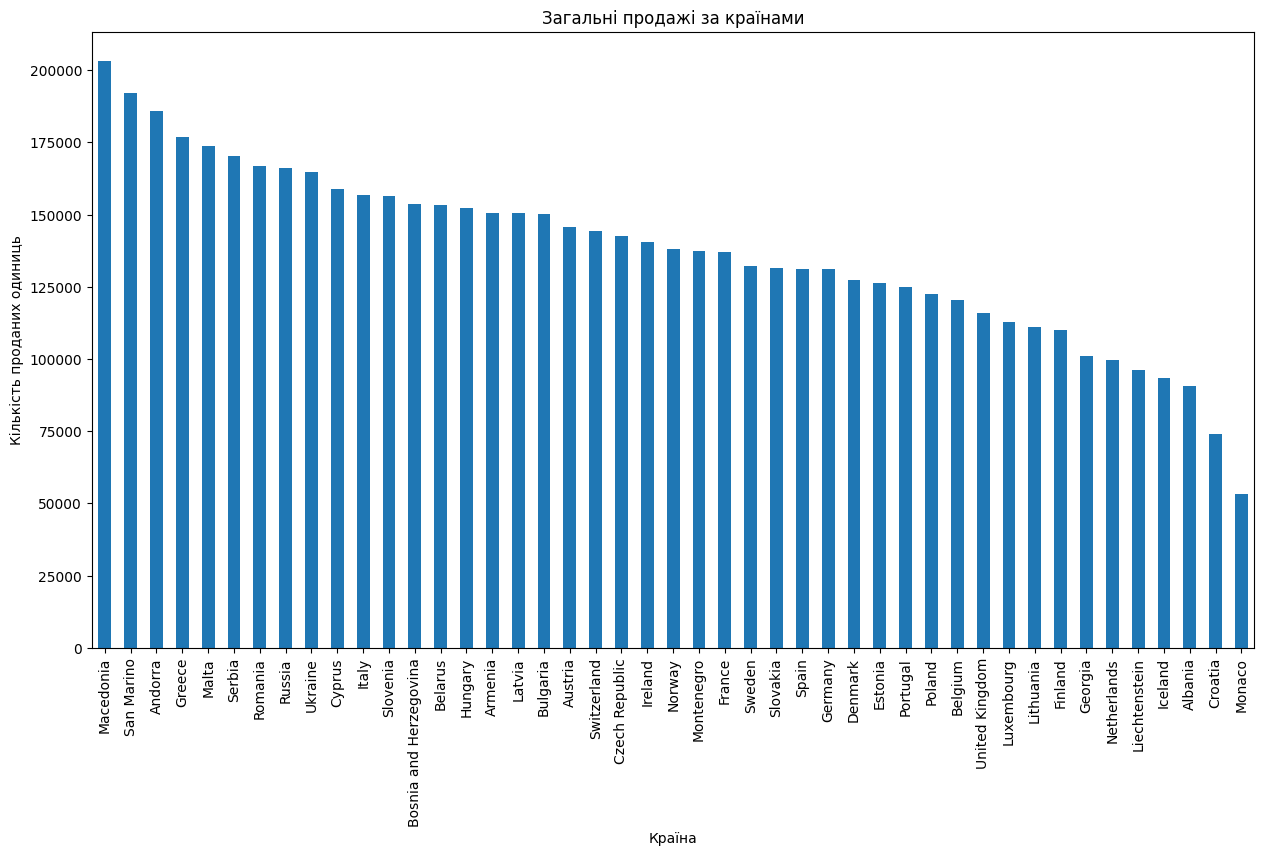

In [ ]:

# Агрегація даних за країною (загальні продажі)
country_sales = merged_df_outer2.groupby('name')['Units Sold'].sum().sort_values(ascending=False)

# Візуалізація загальних продажів за країнами за допомогою гістограми
plt.figure(figsize=(15, 8))
country_sales.plot(kind='bar')
plt.title('Загальні продажі за країнами')
plt.xlabel('Країна')
plt.ylabel('Кількість проданих одиниць')
plt.show()

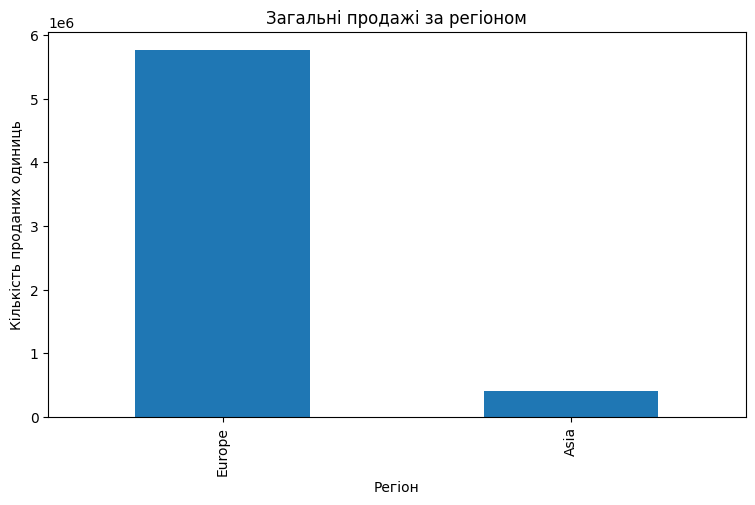

In [ ]:
# Агрегація даних за регіоном (загальні продажі)
region_sales = merged_df_outer2.groupby('region')['Units Sold'].sum().sort_values(ascending=False)

# Візуалізація загальних продажів за регіоном за допомогою гістограми
plt.figure(figsize=(9, 5))
region_sales.plot(kind='bar')
plt.title('Загальні продажі за регіоном')
plt.xlabel('Регіон')
plt.ylabel('Кількість проданих одиниць')
plt.show()

#Головні тенденції
В різні роки, різна тенденція продажу різних груп товарів.
Для більшості категорій найбільш продаваним роком був - 2012, але напої та снеки тримають високу планку продажу, що може бути повʼязано з якимось спортивними подіями.
2017 - став роком, коли продажі в більшості категорій пішли на спад, до критичного рівня впали продажі "Cereal"
Дивлячись на продажі по країнам, бачимо цікавий факт, що перші три місця займають невеличкі краіни: Македонія, Сан-Маріно, Андора. Трійку закриває: Албанія, Хорватія, Монако. Для цих країн потрьіно переглянути політику продажу та підходу до ринку.  Щодо регіону - Європа випереджає Азію майже в 10 раз.

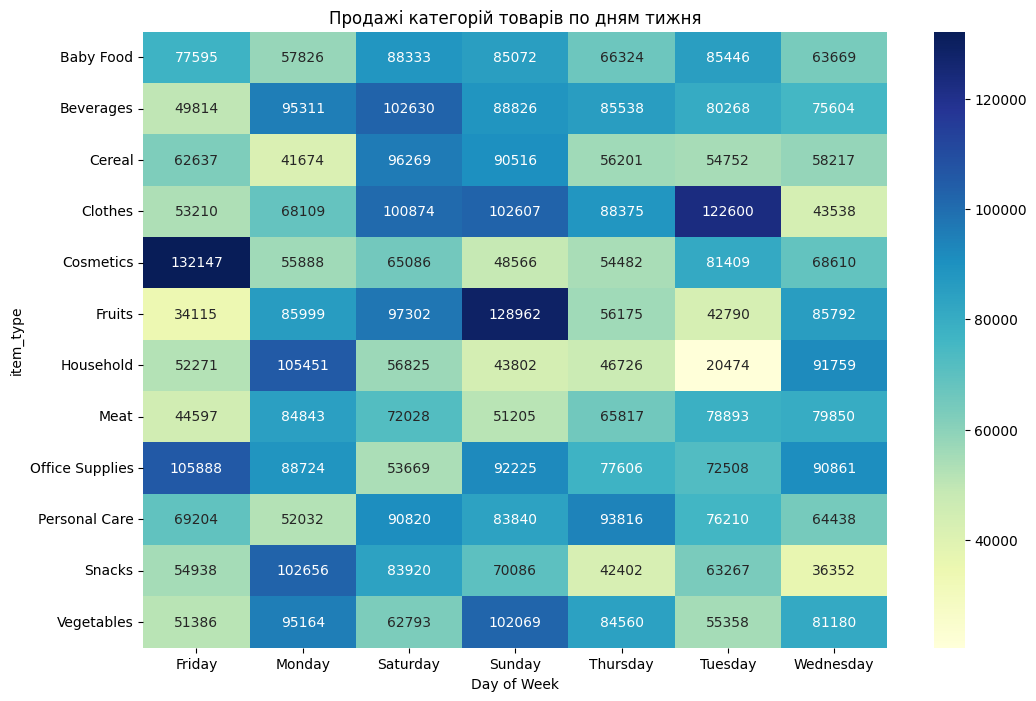

In [ ]:
merged_df_outer2['Day of Week'] = merged_df_outer2['Order Date'].dt.day_name()
pivot_table = pd.pivot_table(merged_df_outer2, values='Units Sold', index='item_type', columns='Day of Week', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Продажі категорій товарів по дням тижня')
plt.show()

До сезонних товарів, можна віднести такі категорії товарів: Косметика, Фрукти, Одяг, Побутові товари.

#Висновки з точки зору бізнес-логіки:

На основі проведеного аналізу можна зробити такі висновки:

**Сезонність та планування:**
 - Виявлено, що деякі товари мають сезонні коливання попиту протягом тижня. Це вимагає адаптації планування товарних запасів, маркетингових кампаній та графіків роботи персоналу.
Наприклад, якщо певний товар має пік продажів у вихідні дні, необхідно забезпечити достатній запас цього товару на складі та спланувати маркетингові акції на ці дні.

**Оптимізація каналів продажів:**
- Аналіз розподілу продажів за каналами дозволяє визначити найбільш ефективні канали.
Це дозволяє оптимізувати інвестиції в різні канали продажів та покращити їхню ефективність.

**Аналіз прибутковості:**
- Аналіз прибутковості дозволяє виявити найбільш прибуткові продукти, країни та канали.
Ця інформація може бути використана для прийняття рішень щодо оптимізації асортименту, ціноутворення та маркетингових стратегій.

**Аналіз по країнам:**
- Аналіз продажів за країнами дозволяє виявити ключові ринки та ринки з низькою активністю продажів.
Це дозволяє адаптувати маркетингові стратегії до особливостей кожного ринку.

**Прийняття стратегічних рішень:**
На основі аналізу даних можна приймати обґрунтовані стратегічні рішення щодо розвитку бізнесу, оптимізації процесів та підвищення прибутковості.